In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
import mlxtend
import pandas_profiling

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import matplotlib.pyplot as plt


C:\Program Files\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C

In [4]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")


In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


----
# EDA

# defining useful functions

## check dataframe general info

In [7]:

%matplotlib inline

import os

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split

import mlxtend
import pandas_profiling





def checkNaValues(dataframe):
    """check nan values in dataframe"""
    
    print("\n# Is there any nan values?: ", dataframe.isna().all().all())
    
    print("## detail missing data ratio")
    #if dataframe.isna().all().all()
    dataframe_na = (dataframe.isna().sum()/len(dataframe))*100
    print(dataframe_na)
    dataframe_na = dataframe_na.drop(
        dataframe_na[dataframe_na == 0].index
    ).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio':dataframe_na})
    print(missing_data)
    
    
    """there is error. so not implemented yet
    # just plot the rate
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=dataframe_na.index, y=dataframe_na.values)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    """

    
def checkObjTypeColumns(dataframe):
    """Check object dtype columns"""

    print("\n# object dtype columns")
    # object dtypeの列名からその列のデータのみを抽出
    df_object_type = dataframe[dataframe.select_dtypes(['object']).columns]
    #df_object_type = dataframe[[x for x in dataframe.columns if dataframe[x].dtypes == "object"]]
    print(df_object_type.head())
    #print(df_object_type.info()) # not useful info
    print(df_object_type.describe())

    
def checkValueCounts(dataframe):
    """check value counts of each features and find boolean feature or not."""

    print("# value_counts of each feature: ")
    for column in dataframe.columns:
        #print("## ", column, ": ")
        #print(dataframe[column].value_counts().head())
        if dataframe[column].value_counts().shape[0] <= 2:
            print(column, " -> maybe boolean. value count:  ", dataframe[column].value_counts().shape[0])
        else:
            print(column, " -> not boolean. value count:  ", dataframe[column].value_counts().shape[0])
            
            
def checkCorrelationOfFeatures(dataframe):
    """check correlation matix of each features"""

    # plot corr
    print("\n# correlation matrix")
    corrmat = dataframe.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, vmax=0.9, square=True)
    plt.show()
    print(corrmat)
    print()
    
    corr_values = corrmat.iloc[0]
    print("## highest correlation: ", corr_values.sort_values().head())
    print("## lowest correlation: ", corr_values.sort_values().tail())

    
def checkSkewness(dataframe):
    """check skewness of each features"""
    
    #numeric_feats = dataframe.dtypes[all_data.dtypes != "object"].index
    numeric_feats = dataframe.select_dtypes(exclude=['object'])
    #print(numeric_feats)
    # Check the skew of all numerical features
    skewed_feats = numeric_feats.apply(
        lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("\n# Skew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    print(skewness)
    
    
def checkAllDataInfo(dataframe):
    """print all dataframe info"""

    print(dataframe.head())
    print("\n# shape: ", dataframe.shape)
    print("\n# columns names: ", train_df.columns.values)
    
    print("\n# df.info(): ")
    print(dataframe.info())
    #print("\n# counts dtypes: \n", dataframe.dtypes.value_counts())# it is included in dataframe.info()

    print("\n# df.describe(): ")
    print(dataframe.describe())
    print()
    
    #print()
    #pandas_profiling.ProfileReport(dataframe)
    print()
    checkNaValues(dataframe)
    print()
    checkObjTypeColumns(dataframe)
    print()
    checkValueCounts(dataframe)
    print()
    checkCorrelationOfFeatures(dataframe)
    
    print()
    checkSkewness(dataframe)

   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

# shape:  (4209, 378)

# columns names:  ['ID' 'y' 'X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X8' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'X24' 'X26'
 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35' 'X36' 'X37' 'X38'
 'X39' 'X40' 'X41' 'X42' 'X43' 'X44

X41  -> maybe boolean. value count:   2
X42  -> maybe boolean. value count:   2
X43  -> maybe boolean. value count:   2
X44  -> maybe boolean. value count:   2
X45  -> maybe boolean. value count:   2
X46  -> maybe boolean. value count:   2
X47  -> maybe boolean. value count:   2
X48  -> maybe boolean. value count:   2
X49  -> maybe boolean. value count:   2
X50  -> maybe boolean. value count:   2
X51  -> maybe boolean. value count:   2
X52  -> maybe boolean. value count:   2
X53  -> maybe boolean. value count:   2
X54  -> maybe boolean. value count:   2
X55  -> maybe boolean. value count:   2
X56  -> maybe boolean. value count:   2
X57  -> maybe boolean. value count:   2
X58  -> maybe boolean. value count:   2
X59  -> maybe boolean. value count:   2
X60  -> maybe boolean. value count:   2
X61  -> maybe boolean. value count:   2
X62  -> maybe boolean. value count:   2
X63  -> maybe boolean. value count:   2
X64  -> maybe boolean. value count:   2
X65  -> maybe boolean. value count:   2


X313  -> maybe boolean. value count:   2
X314  -> maybe boolean. value count:   2
X315  -> maybe boolean. value count:   2
X316  -> maybe boolean. value count:   2
X317  -> maybe boolean. value count:   2
X318  -> maybe boolean. value count:   2
X319  -> maybe boolean. value count:   2
X320  -> maybe boolean. value count:   2
X321  -> maybe boolean. value count:   2
X322  -> maybe boolean. value count:   2
X323  -> maybe boolean. value count:   2
X324  -> maybe boolean. value count:   2
X325  -> maybe boolean. value count:   2
X326  -> maybe boolean. value count:   2
X327  -> maybe boolean. value count:   2
X328  -> maybe boolean. value count:   2
X329  -> maybe boolean. value count:   2
X330  -> maybe boolean. value count:   1
X331  -> maybe boolean. value count:   2
X332  -> maybe boolean. value count:   2
X333  -> maybe boolean. value count:   2
X334  -> maybe boolean. value count:   2
X335  -> maybe boolean. value count:   2
X336  -> maybe boolean. value count:   2
X337  -> maybe b

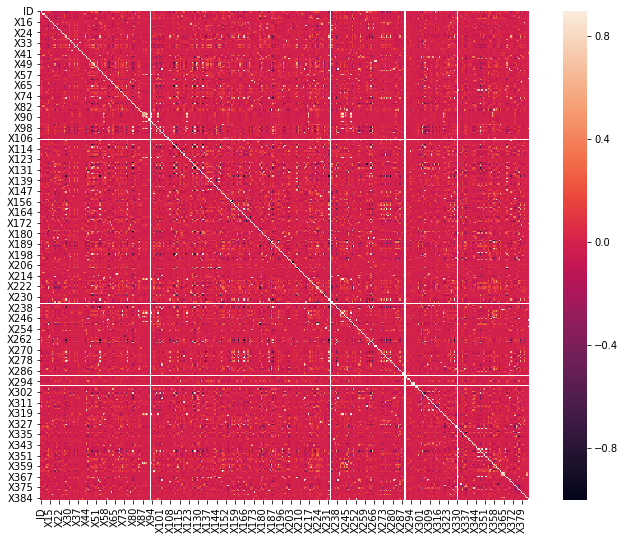

            ID         y       X10  X11       X12       X13       X14  \
ID    1.000000 -0.055108  0.001602  NaN  0.058988 -0.031917 -0.025438   
y    -0.055108  1.000000 -0.026985  NaN  0.089792  0.048276  0.193643   
X10   0.001602 -0.026985  1.000000  NaN -0.033084 -0.028806 -0.100474   
X11        NaN       NaN       NaN  NaN       NaN       NaN       NaN   
X12   0.058988  0.089792 -0.033084  NaN  1.000000  0.214825 -0.246513   
X13  -0.031917  0.048276 -0.028806  NaN  0.214825  1.000000 -0.083141   
X14  -0.025438  0.193643 -0.100474  NaN -0.246513 -0.083141  1.000000   
X15   0.002237  0.023116 -0.002532  NaN -0.006212 -0.005409 -0.018865   
X16  -0.036480  0.048946 -0.005944  NaN -0.014584 -0.012698 -0.044291   
X17  -0.038171 -0.159815 -0.010164  NaN -0.024937 -0.021713  0.012713   
X18  -0.027063 -0.001789 -0.010323  NaN -0.025327 -0.010525 -0.076916   
X19  -0.012762 -0.168895 -0.038610  NaN -0.094730 -0.082482 -0.287691   
X20   0.063216 -0.095148 -0.047393  NaN -0.116280 -


# Skew in numerical features: 

           Skew
X207  64.853683
X257  64.853683
X210  64.853683
X339  64.853683
X260  64.853683
X33   64.853683
X39   64.853683
X280  64.853683
X259  64.853683
X95   64.853683
X190  64.853683
X288  64.853683
X42   64.853683
X270  64.853683
X296  64.853683
X204  64.853683
X295  64.853683
X319  45.842126
X269  45.842126
X369  45.842126
X372  45.842126
X124  45.842126
X278  45.842126
X236  45.842126
X15   45.842126
X384  45.842126
X89   37.416583
X245  37.416583
X40   37.416583
X332  37.416583
...         ...
X156  -0.964959
X273  -0.980640
X51   -0.989856
X275  -1.017811
X363  -1.178663
X96   -1.205653
X142  -1.284877
X103  -1.383928
X150  -1.441478
X144  -1.564204
X209  -2.640084
X265  -2.771247
X189  -2.985872
X238  -3.002509
X70   -3.094616
X304  -3.205677
X101  -3.549674
X98   -3.801784
X80   -3.991289
X348  -4.001892
X61   -4.329457
X136  -4.477215
X263  -4.505450
X120  -4.548651
X128  -4.592909
X229  -4.700547
X361  -5.144778
X111  -6.060807
X74  -3

In [8]:
checkAllDataInfo(train_df)

   ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...   X375  X376  X377  X378  X379  \
0   1  az  v   n  f  d  t  a  w    0  ...      0     0     0     1     0   
1   2   t  b  ai  a  d  b  g  y    0  ...      0     0     1     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...      0     0     0     1     0   
3   4  az  l   n  f  d  z  l  n    0  ...      0     0     0     1     0   
4   5   w  s  as  c  d  y  i  m    0  ...      1     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 377 columns]

# shape:  (4209, 377)

# columns names:  ['ID' 'y' 'X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X8' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'X24' 'X26'
 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35' 'X36' 'X37' 'X38'
 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45' 'X46' 'X47

X77  -> maybe boolean. value count:   2
X78  -> maybe boolean. value count:   2
X79  -> maybe boolean. value count:   2
X80  -> maybe boolean. value count:   2
X81  -> maybe boolean. value count:   2
X82  -> maybe boolean. value count:   2
X83  -> maybe boolean. value count:   2
X84  -> maybe boolean. value count:   2
X85  -> maybe boolean. value count:   2
X86  -> maybe boolean. value count:   2
X87  -> maybe boolean. value count:   2
X88  -> maybe boolean. value count:   2
X89  -> maybe boolean. value count:   2
X90  -> maybe boolean. value count:   2
X91  -> maybe boolean. value count:   2
X92  -> maybe boolean. value count:   2
X93  -> maybe boolean. value count:   2
X94  -> maybe boolean. value count:   2
X95  -> maybe boolean. value count:   2
X96  -> maybe boolean. value count:   2
X97  -> maybe boolean. value count:   2
X98  -> maybe boolean. value count:   2
X99  -> maybe boolean. value count:   2
X100  -> maybe boolean. value count:   2
X101  -> maybe boolean. value count:   

X344  -> maybe boolean. value count:   2
X345  -> maybe boolean. value count:   2
X346  -> maybe boolean. value count:   2
X347  -> maybe boolean. value count:   2
X348  -> maybe boolean. value count:   2
X349  -> maybe boolean. value count:   2
X350  -> maybe boolean. value count:   2
X351  -> maybe boolean. value count:   2
X352  -> maybe boolean. value count:   2
X353  -> maybe boolean. value count:   2
X354  -> maybe boolean. value count:   2
X355  -> maybe boolean. value count:   2
X356  -> maybe boolean. value count:   2
X357  -> maybe boolean. value count:   2
X358  -> maybe boolean. value count:   2
X359  -> maybe boolean. value count:   2
X360  -> maybe boolean. value count:   2
X361  -> maybe boolean. value count:   2
X362  -> maybe boolean. value count:   2
X363  -> maybe boolean. value count:   2
X364  -> maybe boolean. value count:   2
X365  -> maybe boolean. value count:   2
X366  -> maybe boolean. value count:   2
X367  -> maybe boolean. value count:   2
X368  -> maybe b

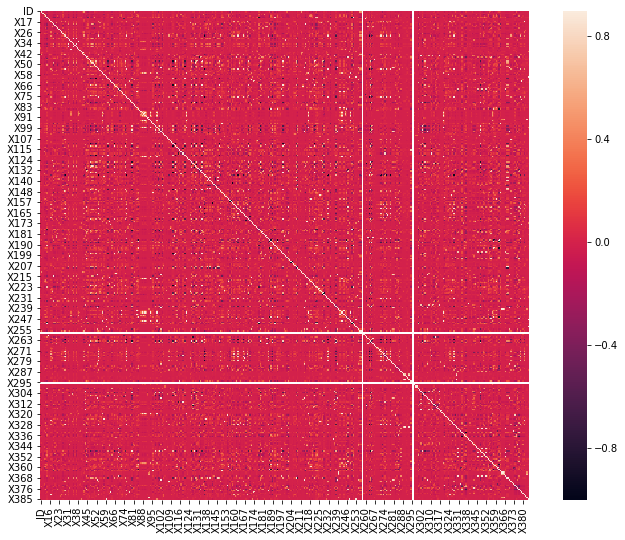

            ID       X10       X11       X12       X13       X14       X15  \
ID    1.000000 -0.016166 -0.020253  0.043162  0.017910 -0.036099  0.005100   
X10  -0.016166  1.000000 -0.002146 -0.039453 -0.035496 -0.120379 -0.003717   
X11  -0.020253 -0.002146  1.000000 -0.004369 -0.003931  0.017825 -0.000412   
X12   0.043162 -0.039453 -0.004369  1.000000  0.283228 -0.245127 -0.007570   
X13   0.017910 -0.035496 -0.003931  0.283228  1.000000 -0.076145 -0.006811   
X14  -0.036099 -0.120379  0.017825 -0.245127 -0.076145  1.000000 -0.023097   
X15   0.005100 -0.003717 -0.000412 -0.007570 -0.006811 -0.023097  1.000000   
X16  -0.024482 -0.007125 -0.000789 -0.014509 -0.013054 -0.044269 -0.001367   
X17  -0.021581 -0.013108 -0.001452 -0.016991 -0.024015  0.000864 -0.002515   
X18  -0.010920 -0.014142 -0.001566 -0.028796 -0.025908 -0.087862 -0.002713   
X19  -0.020800 -0.049351 -0.005466 -0.100493 -0.090413 -0.306620 -0.009469   
X20   0.075223 -0.056036 -0.006206 -0.114106 -0.045375 -0.348156

In [9]:
checkAllDataInfo(test_df)

## checkTargetInfo(dataframe, target_name="y"): print target y value info

In [10]:
def checkTargetInfo(dataframe, target_name="y"):
    """print target y value info"""
 
    # plot distribution
    sns.distplot(train_df[target_name], fit=norm)
    (mu, sigma) = norm.fit(train_df[target_name])
    print("mu, sigma:", mu, sigma)

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('target value distribution')

    
    # plot skewness

    #print("skewness of y", skew(dataframe[target_name]))
    print("skewness of y", train_df[target_name].skew())
    fig = plt.figure()
    res = stats.probplot(train_df[target_name], plot=plt)
    plt.show()



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu, sigma: 100.669318128 12.6778749695
skewness of y 1.20652585224


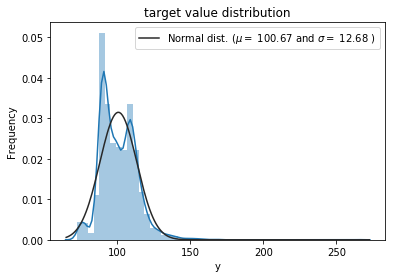

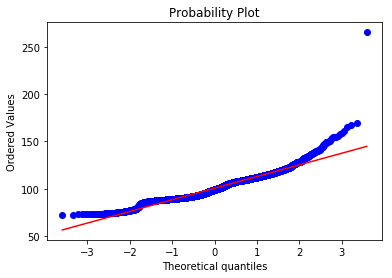

In [11]:
checkTargetInfo(train_df, target_name="y")

np.log1pを適用したが、余り変化なかった

## checkCorrelationOfSelectedFeatures(dataframe, columns):


# correlation matrix


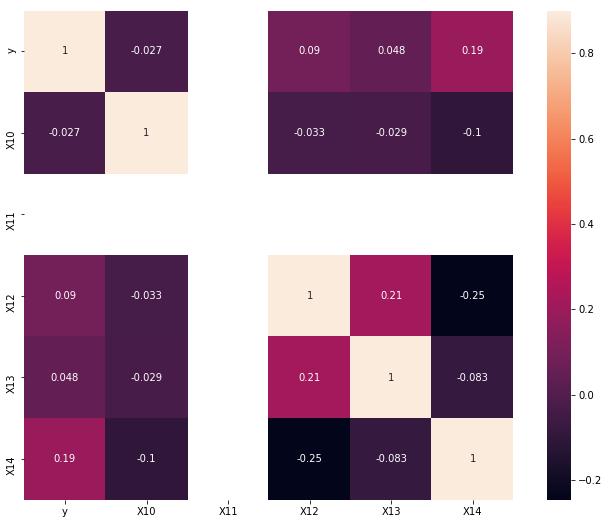

            y       X10  X11       X12       X13       X14
y    1.000000 -0.026985  NaN  0.089792  0.048276  0.193643
X10 -0.026985  1.000000  NaN -0.033084 -0.028806 -0.100474
X11       NaN       NaN  NaN       NaN       NaN       NaN
X12  0.089792 -0.033084  NaN  1.000000  0.214825 -0.246513
X13  0.048276 -0.028806  NaN  0.214825  1.000000 -0.083141
X14  0.193643 -0.100474  NaN -0.246513 -0.083141  1.000000


In [12]:
def checkCorrelationOfSelectedFeatures(dataframe, columns):
    """check correlation matix of each features"""

    # plot corr
    print("\n# correlation matrix")
    corrmat = dataframe[columns].corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)
    plt.show()
    print(corrmat)
    
    
columns = ["y", "X10", "X11", "X12", "X13", "X14"]
checkCorrelationOfSelectedFeatures(train_df, columns)

## def splitToIdTargetFeatures(train_df):

In [13]:
def splitToIdTargetFeatures(dataframe, id_name, target_name):
    
    id_df = dataframe[id_name]
    target_df = dataframe[target_name]
    features_df = dataframe.drop([id_name, target_name], axis=1)
    
    return id_df, target_df, features_df

In [14]:
id_df, target_df, features_df = splitToIdTargetFeatures(train_df, id_name="ID", target_name="y")

id_df.head()

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64

In [15]:
target_df.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [16]:
features_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


## pairplot

- not good idea to make function
- better to use pairplot() directly. more useful.

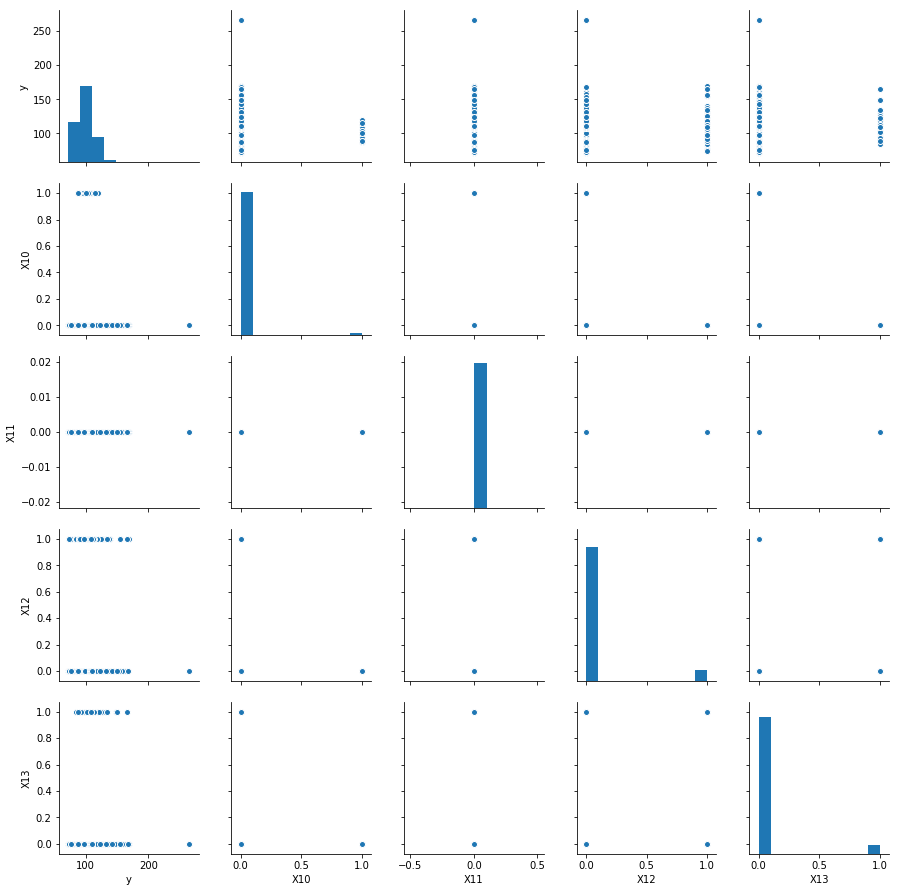

In [17]:
sns.pairplot(train_df, vars=["y", "X10", "X11", "X12", "X13"]) # takes too much time



----

# feature eng

In [18]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

all_id, all_target, all_data = splitToIdTargetFeatures(all_data, id_name="ID", target_name="y")

#all_data.drop(['y'], axis=1, inplace=True)

In [19]:
all_data.shape

(8418, 376)

In [20]:
all_data.head()

,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,k,v,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,az,w,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,az,t,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,az,v,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
all_data.tail()

,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
8413,aj,h,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8414,t,aa,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8415,y,v,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8416,ak,v,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8417,t,aa,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
all_id.head()

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64

In [23]:
all_id.tail()

8413    8410
8414    8411
8415    8413
8416    8414
8417    8416
Name: ID, dtype: int64

In [24]:
all_target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [25]:
all_target.tail()

8413   NaN
8414   NaN
8415   NaN
8416   NaN
8417   NaN
Name: y, dtype: float64

## skew feature

In [26]:
checkSkewness(all_data)


# Skew in numerical features: 

           Skew
X233  91.733310
X297  91.733310
X11   91.733310
X235  91.733310
X268  91.733310
X296  91.733310
X295  91.733310
X293  91.733310
X290  91.733310
X330  91.733310
X257  91.733310
X190  64.853683
X347  64.853683
X369  64.853683
X259  64.853683
X339  64.853683
X280  64.853683
X289  64.853683
X210  64.853683
X288  64.853683
X93   64.853683
X278  52.943369
X236  52.943369
X124  52.943369
X372  52.943369
X252  45.842126
X270  45.842126
X107  45.842126
X95   45.842126
X33   45.842126
...         ...
X156  -0.944914
X273  -0.959115
X51   -0.970170
X275  -1.013119
X363  -1.152142
X96   -1.172730
X142  -1.269795
X103  -1.397666
X150  -1.425548
X144  -1.537248
X209  -2.627196
X265  -2.839248
X238  -3.059389
X189  -3.062292
X70   -3.100571
X304  -3.277886
X101  -3.569890
X98   -3.806500
X80   -4.050459
X348  -4.066965
X61   -4.316619
X229  -4.415272
X120  -4.534135
X136  -4.592909
X263  -4.607904
X128  -4.692647
X361  -5.000386
X111  -6.076302
X74  -2

## find boolean feature

In [27]:
checkValueCounts(all_data)

# value_counts of each feature: 
X0  -> not boolean. value count:   53
X1  -> not boolean. value count:   27
X10  -> maybe boolean. value count:   2
X100  -> maybe boolean. value count:   2
X101  -> maybe boolean. value count:   2
X102  -> maybe boolean. value count:   2
X103  -> maybe boolean. value count:   2
X104  -> maybe boolean. value count:   2
X105  -> maybe boolean. value count:   2
X106  -> maybe boolean. value count:   2
X107  -> maybe boolean. value count:   2
X108  -> maybe boolean. value count:   2
X109  -> maybe boolean. value count:   2
X11  -> maybe boolean. value count:   2
X110  -> maybe boolean. value count:   2
X111  -> maybe boolean. value count:   2
X112  -> maybe boolean. value count:   2
X113  -> maybe boolean. value count:   2
X114  -> maybe boolean. value count:   2
X115  -> maybe boolean. value count:   2
X116  -> maybe boolean. value count:   2
X117  -> maybe boolean. value count:   2
X118  -> maybe boolean. value count:   2
X119  -> maybe boolean. value co

X287  -> maybe boolean. value count:   2
X288  -> maybe boolean. value count:   2
X289  -> maybe boolean. value count:   2
X29  -> maybe boolean. value count:   2
X290  -> maybe boolean. value count:   2
X291  -> maybe boolean. value count:   2
X292  -> maybe boolean. value count:   2
X293  -> maybe boolean. value count:   2
X294  -> maybe boolean. value count:   2
X295  -> maybe boolean. value count:   2
X296  -> maybe boolean. value count:   2
X297  -> maybe boolean. value count:   2
X298  -> maybe boolean. value count:   2
X299  -> maybe boolean. value count:   2
X3  -> not boolean. value count:   7
X30  -> maybe boolean. value count:   2
X300  -> maybe boolean. value count:   2
X301  -> maybe boolean. value count:   2
X302  -> maybe boolean. value count:   2
X304  -> maybe boolean. value count:   2
X305  -> maybe boolean. value count:   2
X306  -> maybe boolean. value count:   2
X307  -> maybe boolean. value count:   2
X308  -> maybe boolean. value count:   2
X309  -> maybe boolean

## Box Cox Transformation of (highly) skewed features

almost all are boolean features.

need to exclude boolean for trans


----

# prepare train/test data

## with categorical feature
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat

In [28]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#X_train_df_with_cat = train_df.drop(["y", "ID"], axis=1)
#y_train_df = train_df["y"]
#id_train_df = train_df["ID"]

id_train_df, y_train_df, X_train_df_with_cat = splitToIdTargetFeatures(train_df, id_name="ID", target_name="y")

In [30]:
print(id_train_df.head())
print(y_train_df.head())
print(X_train_df_with_cat.head())

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64
0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64
   X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  X379  \
0   k  v  at  a  d  u  j  o    0    0  ...      0     0     1     0     0   
1   k  t  av  e  d  y  l  o    0    0  ...      1     0     0     0     0   
2  az  w   n  c  d  x  j  x    0    0  ...      0     0     0     0     0   
3  az  t   n  f  d  x  l  e    0    0  ...      0     0     0     0     0   
4  az  v   n  f  d  h  d  n    0    0  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]


In [31]:
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat = train_test_split(
    X_train_df_with_cat, y_train_df, 
    test_size=0.33, random_state=42)
print("train/test data shape", X_train_with_cat.shape, X_test_with_cat.shape)


train/test data shape (2820, 376) (1389, 376)


In [32]:
X_train_df_with_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


## get object type columns

In [33]:
obj_columns = X_train_df_with_cat.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [X_train_df_with_cat.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7]


## without categorical feature

X_train, X_test, y_train, y_test

In [34]:
id_train_df = train_df["ID"] # defining again. maybe in future, I will data set with categorical feature which I defined before. 
id_test_df = test_df["ID"]

In [35]:
# defining ntrain, all_data again. maybe in future, I will data set with categorical feature which I defined before.
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
#all_data.drop(['y', "ID"], axis=1, inplace=True)
all_id, all_target, all_data  = splitToIdTargetFeatures(all_data, id_name="ID", target_name="y")

print("all_data.shape before: ", all_data.shape)
all_data = pd.get_dummies(all_data)
print("all_data.shape after get_dummies: ", all_data.shape)

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

all_data.shape before:  (8418, 376)
all_data.shape after get_dummies:  (8418, 579)


In [36]:
print("train_df.shape: ", train_df.shape)
train_df.head()

train_df.shape:  (4209, 579)


,X10,X100,X101,X102,X103,X104,X105,X106,X107,X108,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y_train_df,
    test_size=0.33, random_state=42)
print("train/test data shape", X_train.shape, X_test.shape)


train/test data shape (2820, 579) (1389, 579)


In [38]:
X_train.head()

,X10,X100,X101,X102,X103,X104,X105,X106,X107,X108,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2218,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
582,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# base model

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from hyperopt import hp, tpe, Trials, fmin

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge

import lightgbm as lgb

## Defined find best parameter function by hyperopt module

In [54]:


def hyperopt_objective(model_name, X_train, y_train, scoring="r2", cv_size=5, n_jobs=3):
    """return objective function for hyperopt"""

    def objective(args):
        if model_name == "SVR":
            model = make_pipeline(
                RobustScaler(),
                SVR(**args)
            )
        elif model_name == "Lasso":
            model = make_pipeline(
                RobustScaler(),
                Lasso(**args)
            )
        elif model_name == "ElasticNet":
            model = make_pipeline(
                RobustScaler(),
                ElasticNet(**args)
            )
        elif model_name == "KernelRidge":
            model = make_pipeline(
                #RobustScaler(),
                KernelRidge(**args)
            )

        score = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv_size, n_jobs=n_jobs)
        return -score.mean()

    return objective





def searchHyperParam(model_name, par_space, X_train, y_train, scoring="r2", max_evals=100, cv_size=5, n_jobs=3):
    """search hyper parameter of a selected model"""

    objective = hyperopt_objective(model_name, X_train, y_train, scoring=scoring, cv_size=cv_size, n_jobs=n_jobs)
    
    #best_params = findBestParm(objective, par_space, X_train, y_train, scoring=scoring, max_evals=max_evals)

    trials = Trials()

    best = fmin(
        objective, 
        par_space, # 探索するパラメータのdictもしくはlist
        algo=tpe.suggest, # どのロジックを利用するか、基本的にはtpe.suggestでok
        max_evals=max_evals,
        trials=trials,
        verbose=1
    )
    print("best par for : ", model_name, "-> ", best)
    print("best trial: ", trials.best_trial["result"])
    #print("trials losses: ", trials.losses())
    
    return best


def evalModelByCV(model, X_train, y_train):
    """evaluate model by cross validation"""
    
    score = cross_val_score(svr, X_train, y_train, scoring="r2", cv=5)

    print("model score: {:f} ({:f})\n" .format(
        score.mean(), score.std()))
    print("all scores: ", score)


## Def hyperopt param

In [41]:
cv_size = 5
max_evals = 100 

## SVR

In [63]:
best_params = {'C': 6.0125849233435975,
 'epsilon': 0.018596343856883617,
 'gamma': 0.019396603678872793,
 'kernel': 'rbf'}

In [64]:
svr = make_pipeline(
    RobustScaler(),
    SVR(**best_params)

)

evalModelByCV(svr, X_train, y_train)

model score: 0.560221 (0.038602)

all scores:  [ 0.50396199  0.57454623  0.55852882  0.62156701  0.54250185]


## lasso

In [65]:
best_params = {'alpha': 0.03813148491610924}

In [66]:
lasso = make_pipeline(
    RobustScaler(),
    Lasso(**best_params)

)

evalModelByCV(lasso, X_train, y_train)

model score: 0.560221 (0.038602)

all scores:  [ 0.50396199  0.57454623  0.55852882  0.62156701  0.54250185]


## Elastic net

In [67]:
best_params = {'alpha': 0.03979354323226861, 'l1_ratio': 0.9027788528223015}

In [68]:
elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNet(**best_params)

)

evalModelByCV(elasticnet, X_train, y_train)

model score: 0.560221 (0.038602)

all scores:  [ 0.50396199  0.57454623  0.55852882  0.62156701  0.54250185]


## kernel ridge

In [69]:
best_params = {'alpha': 0.08155265321674764,
 'degree': 4,
 'gamma': 0.0008945296235245703,
 'kernel': 0}

In [70]:
KRR = make_pipeline(
        #RobustScaler(),
        KernelRidge(**best_params)
)

evalModelByCV(elasticnet, X_train, y_train)

model score: 0.560221 (0.038602)

all scores:  [ 0.50396199  0.57454623  0.55852882  0.62156701  0.54250185]


## k neighbers

## gradient boosting

## XGBoost

## LightGBM

In [50]:
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin = 55,
    bagging_fraction = 0.8,
    bagging_freq = 5,
    feature_fraction = 0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf =6,
    min_sum_hessian_in_leaf = 11,
#    verbose=1,
#    n_jobs=3
)
score = cross_val_score(model_lgb, X_train, y_train, scoring="r2", cv=5)

print("svr score: {0} ({1})\n".format(
    score.mean(), score.std()))

svr score: 0.5839813049155873 (0.028133023147325242)



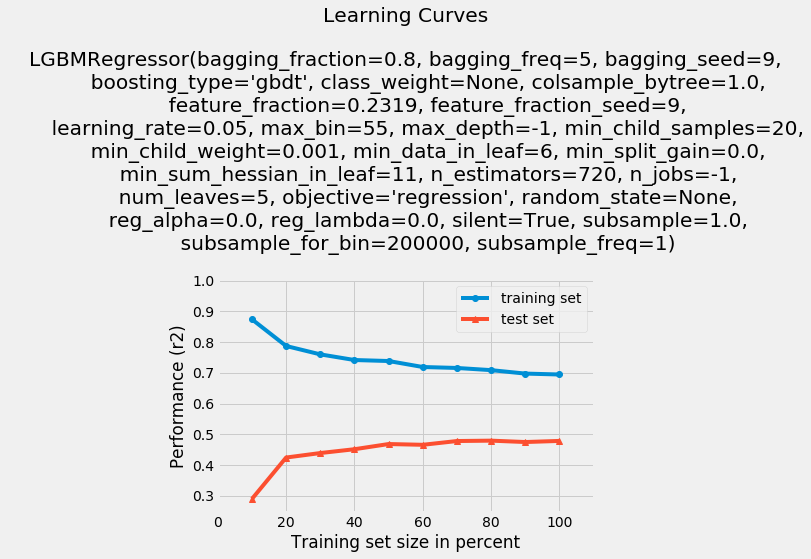

In [51]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test,
                     model_lgb, scoring="r2")
plt.show()

### try to fit by all data and predict

In [52]:
model_lgb.fit(train_df, y_train_df)
model_lgb.predict(test_df)

array([  77.63849614,   93.14265387,   79.26731039, ...,   90.69358476,
        110.71342709,   90.48630079])

### tried categorical_feature, but object type is not supported yet.
https://github.com/Microsoft/LightGBM/issues/1020

## catboost

In [53]:
from catboost import CatBoostRegressor

print(list(obj_columns.columns.values))
print(cat_dims)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
X_train_with_cat.head()

In [ ]:
catReg = CatBoostRegressor(learning_rate=1,
                          depth=6,
                          loss_function='RMSE')

fit_model = catReg.fit(X_train_with_cat, y_train_with_cat, cat_features=cat_dims)


# todo

how to use R2 for scorignr

https://tech.yandex.com/catboost/doc/dg/concepts/loss-functions-docpage/

## xgboost

## sklearn GBT

# Make submission file
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions?sortBy=date&group=all&page=1

In [102]:
sub = pd.DataFrame()
sub['ID'] = id_test_df
sub['y'] = model_lgb.predict(test_df)
sub.to_csv('../output/submission.csv', index=False)
